In [34]:
import numpy as np
import pandas as pd

# 1. Data Preparation

In [35]:
'''
Data Preparation adalah proses persiapan data sebelum dilakukan pemodelan.
Data Preparation meliputi proses pengumpulan data, pembersihan data, transformasi data, dan pemilihan data.
Data Preparation adalah proses yang sangat penting dalam proses analisis data.
Data Preparation yang baik akan menghasilkan model yang baik.

age : Umur
sex : Jenis Kelamin
cp : Tipe Nyeri Dada
trestbps : Tekanan Darah
chol : Kolesterol
fbs : Gula Darah
restecg : Elektrokardiografi
thalach : Detak Jantung Maksimal
exang : Angina yang Diinduksi Latihan
oldpeak : Depresi ST yang Diinduksi Latihan
slope : Kemiringan Segmen ST
ca : Jumlah Pembuluh Besar
thal : Thalium Stress Test
target : (0 = Tidak Ada Serangan Jantung, 1 = Ada Serangan Jantung)
'''
df = pd.read_csv('./Heart Attack Data Set.csv')
print("===Data Info===")
print(df.info())
# print("===Data Describe===")
# print(df.describe())



# df.to_excel('./Doucumentation/manualisasi.xlsx', index=False)


===Data Info===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None


# 2. Data Preposesing

In [36]:
'''
data prepossessing is The data pre-processing stage is for cleaning data from missing values, separating features and
targets, and mapping values on the target variable y
'''
#Removing missing values
print("banyak data yang drop: ", df.shape[0]-df.dropna().shape[0])
df = df.dropna()
print("===Data Info After Removing Missing Values===")
print(df.info())




banyak data yang drop:  0
===Data Info After Removing Missing Values===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None


# 3. Exploratory Data Analysis

jumlah data yang memiliki target 0:  138
jumlah data yang memiliki target 1:  165


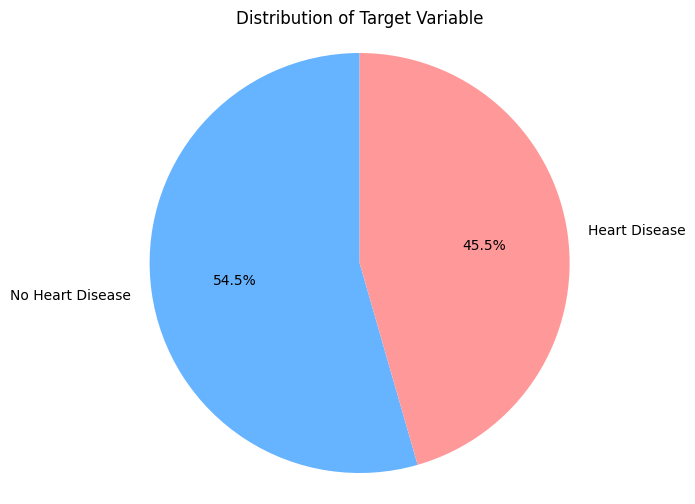

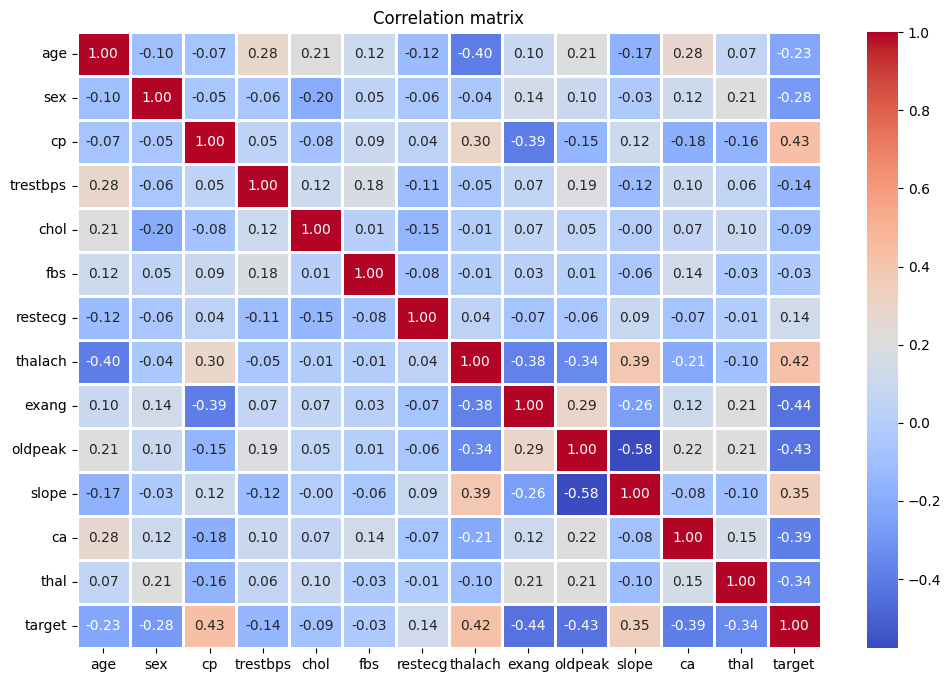

'\nData Transformation is a process of converting data from one form to another.\nData Transformation is done to make the data more suitable for analysis.\nData Transformation is done to make the data more suitable for modeling.\nData Transformation is done to make the data more suitable for visualization.\n'

In [ ]:
'''
EDA is an analytical process to analyze and understand data before
building a heart disease classification model. The  EDA  stage  that  has  been  carried  out  results  in  the  analysis  of  2  types  of  analysis: 
univariate and multivariate. The diagram shows that the target data from the "no heart disease" 
sample is 53.9%. Meanwhile, the target data from the "heart disease" sample is 46.1%. It can be 
concluded that the dataset is not balanced. Multivariate analysis using  the Pearson correlation 
matrix aims to find the correlation between variables. The Pearson correlation matrix is shown 
in Figure 5. A value close to 0 indicates no linear relationship between two variables. The feature 
with  a low correlation with the target feature is "fbs" (fasting blood sugar). Two features are 
close  to  the  value  of  1,  namely  the  features  "ca"  (Number  of  major  vessels)  and  "thal" 
(Thalassemia).  These  two  features  show  a  strong  positive  linear  relationship  with  the  target 
feature. 
Figure 3. Visualization of y variable after value mapping 

'''
#EDA
import matplotlib.pyplot as plt
import seaborn as sns
#Distribution of target variable

#cetak jumlah data yang memiliki target 0 dan 1
print("jumlah data yang memiliki target 0: ", df[df['target'] == 0].shape[0])
print("jumlah data yang memiliki target 1: ", df[df['target'] == 1].shape[0])


# Pie chart for distribution of target variable
target_counts = df['target'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(target_counts, labels=['No Heart Disease', 'Heart Disease'], autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#ff9999'])
plt.title('Distribution of Target Variable')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


#Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=2)
plt.title('Correlation matrix')
plt.show()
5

'''
Data Transformation is a process of converting data from one form to another.
Data Transformation is done to make the data more suitable for analysis.
Data Transformation is done to make the data more suitable for modeling.
Data Transformation is done to make the data more suitable for visualization.
'''

# 4. Split Data

Jumlah baris data training:  242  dimana kelas 1:  133  dan kelas 0:  109
Jumlah baris data testing:  61  dimana kelas 1:  32  dan kelas 0:  29


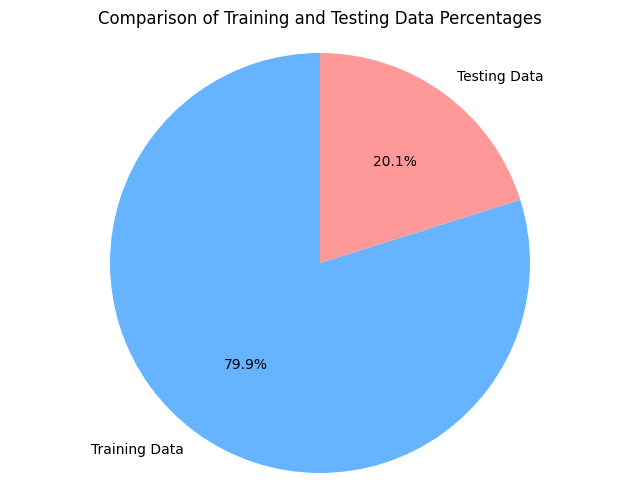

'\n    Feature scaling is a method used to standardize the range of independent variables or features of data.\n    In data processing, it is also known as data normalization and is generally performed during the data preprocessing step.\n'

In [38]:
'''
    split data mebagi data menjadi data training dan data testing
    dimana 80% data training dan 20% data testing
'''
from sklearn.model_selection import train_test_split
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Jumlah baris data training: ", X_train.shape[0], " dimana kelas 1: ", y_train[y_train == 1].shape[0], " dan kelas 0: ", y_train[y_train == 0].shape[0])
print("Jumlah baris data testing: ", X_test.shape[0], " dimana kelas 1: ", y_test[y_test == 1].shape[0], " dan kelas 0: ", y_test[y_test == 0].shape[0])



#visualisasi data with pie chart
train_percentage = len(X_train) / len(df) * 100
test_percentage = len(X_test) / len(df) * 100

labels = ['Training Data', 'Testing Data']
sizes = [train_percentage, test_percentage]
colors = ['#66b3ff', '#ff9999']

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Comparison of Training and Testing Data Percentages')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

'''
    Feature scaling is a method used to standardize the range of independent variables or features of data.
    In data processing, it is also known as data normalization and is generally performed during the data preprocessing step.
'''

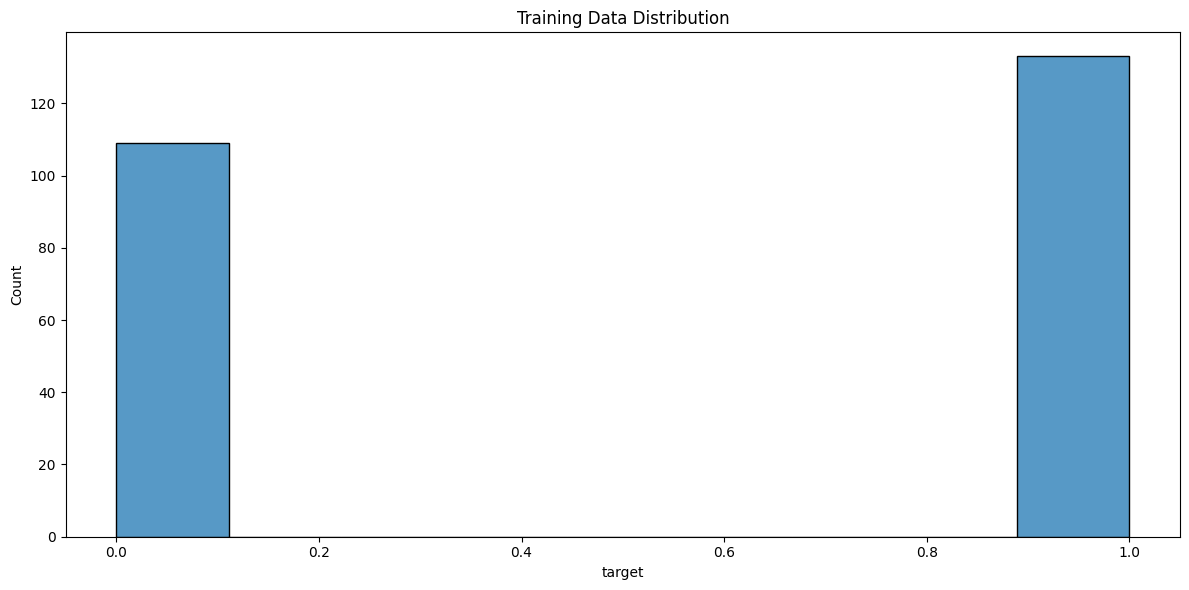

target data training: 0 = 109 1 = 133


In [39]:
#visualliation data
import matplotlib.pyplot as plt
import seaborn as sns 
'''
Feature:
1. age
2. sex
3. cp
4. trestbps
5. chol
6. fbs
7. restecg
8. thalach
9. exang
10. oldpeak
11. slope
12. ca
13. thal
'''
# visualisasi pada data training
fig, axes = plt.subplots(1, 1, figsize=(12, 6))
sns.histplot(y_train, ax=axes)
axes.set_title('Training Data Distribution')
plt.tight_layout()
plt.show()

print("target data training: 0 = {} 1 = {}".format(y_train.value_counts()[0], y_train.value_counts()[1]))


# 5. Synthetic Minority Over-sampling Technique (SMOTE)

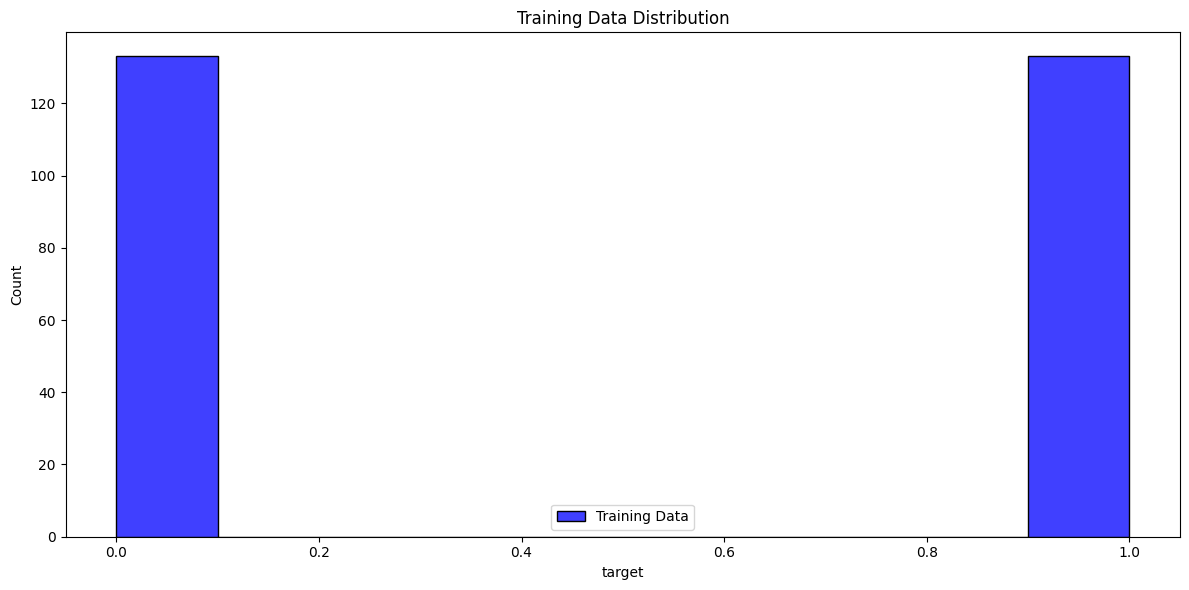

In [40]:
'''
    SMOTE (Synthetic Minority Over Sampling Technique) is a technique used to solve the problem of imbalanced data.
    SMOTE works by selecting examples that are close in the feature space, drawing a line between the examples in the feature space,
    and drawing a new sample at a point along that line.
'''
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


# Visualisasi at data training after SMOTE
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
sns.histplot(y_train_smote, ax=ax, color='blue', label='Training Data')
ax.set_title('Training Data Distribution')
ax.legend()
plt.tight_layout()
plt.show()

# 6. Normalization

In [41]:
'''
    Normalization is the process of scaling individual samples to have unit norm.
    This process can be useful if you plan to use a quadratic form such as the dot-product or any other kernel to quantify the similarity of any pair of samples.
    StandardScaler is used to normalize the data.
'''
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_smote = scaler.fit_transform(X_train_smote)
X_test = scaler.transform(X_test)

# Display the normalization formula
print("Normalization formula: X' = (X - mean) / std")



'''
    Feature selection is the process of selecting a subset of relevant features for use in model construction.
    Feature selection techniques are used for several reasons:
    simplification of models to make them easier to interpret by researchers/users,
    shorter training times,
    to avoid the curse of dimensionality,
    enhanced generalization by reducing overfitting
'''

Normalization formula: X' = (X - mean) / std


'\n    Feature selection is the process of selecting a subset of relevant features for use in model construction.\n    Feature selection techniques are used for several reasons:\n    simplification of models to make them easier to interpret by researchers/users,\n    shorter training times,\n    to avoid the curse of dimensionality,\n    enhanced generalization by reducing overfitting\n'

# 7. Classification using Deep Neural Network (DNN)

c:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_56 (Dense)                │ (None, 64)             │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_57 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_58 (Dense)                │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_59 (Dense)                │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_60 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_61 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_62 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 338,177 (1.29 MB)

 Trainable params: 338,177 (1.29 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - accuracy: 0.5915 - loss: 0.6419 - val_accuracy: 0.8852 - val_loss: 0.4055
Epoch 2/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8587 - loss: 0.3663 - val_accuracy: 0.8689 - val_loss: 0.3670
Epoch 3/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8647 - loss: 0.3460 - val_accuracy: 0.8689 - val_loss: 0.4711
Epoch 4/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9196 - loss: 0.2552 - val_accuracy: 0.8689 - val_loss: 0.5809
Epoch 5/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9480 - loss: 0.1739 - val_accuracy: 0.8525 - val_loss: 0.5763
Epoch 6/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9364 - loss: 0.1358 - val_accuracy: 0.8197 - val_loss: 0.8099
Epoch 7/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9782 - loss: 0.0905 - val_accuracy: 0.8361 - val_loss: 0.9892
Epoch 8/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9690 - loss: 0.1043 - val_accuracy: 0.8361 - val_l

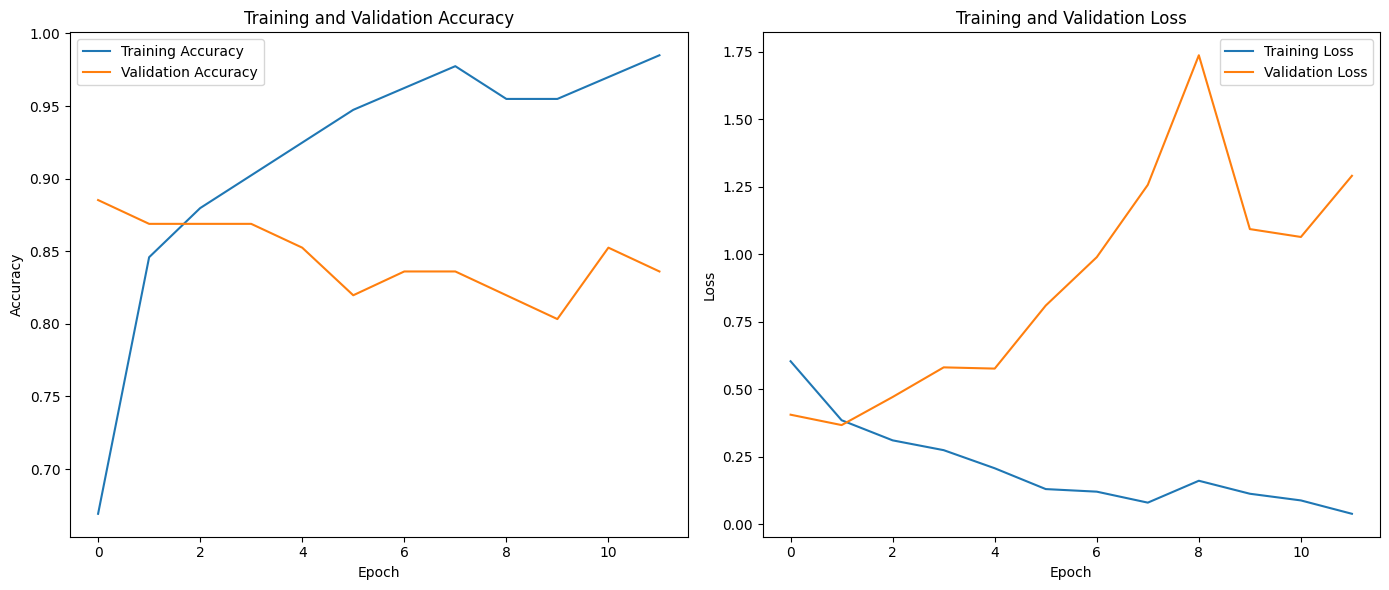

"\n    The model evaluation is used to evaluate the model that has been created.\n    The evaluation is done by comparing the model's prediction with the actual data.\n"

In [42]:
'''
    DNN (Deep Neural Network) is a type of artificial neural network with multiple layers between the input and output layers.
    The DNN finds the correct mathematical manipulation to turn the input into the output, whether it be a linear relationship or a non-linear relationship.
    The network moves through the layers calculating the probability of each output.
    Parameter = Value
    Number of layers = 8
    Number of neurons input layer = 64
    Number of neurons hidden layer 1 = 128
    Number of neurons hidden layer 2 = 256
    Number of neurons hidden layer 3 = 512
    Number of neurons hidden layer 4 = 256
    Number of neurons hidden layer 5 = 128
    Dropout rate = 0.5
    Number of neurons output layer = 1
    Regularization kernel L2 = 0.001
    Learning rate = 0.001
    Epochs = 50
    Batch size = 16
    Activation function = ReLU
    Optimizer = Adam
'''
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping

# Define the model
model = Sequential()
model.add(Dense(64, input_dim=13, activation='relu'))  # Input layer
model.add(Dense(128, activation='relu'))              # Hidden layer 1
model.add(Dense(256, activation='relu'))              # Hidden layer 2
model.add(Dense(512, activation='relu'))              # Hidden layer 3
model.add(Dense(256, activation='relu'))              # Hidden layer 4
model.add(Dense(128, activation='relu'))              # Hidden layer 5
model.add(Dropout(0.5))                               # Dropout layer
model.add(Dense(1, activation='sigmoid', kernel_regularizer=l2(0.001)))  # Output layer

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Model summary
model.summary()

# Define EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',       # Metric to monitor
    patience=10,              # Number of epochs to wait for improvement
    restore_best_weights=True # Restore model to best weights
)

# Train the model with EarlyStopping
history = model.fit(
    X_train_smote, y_train_smote,  # Training data
    epochs=50,                     # Maximum number of epochs
    batch_size=16,                 # Batch size
    validation_data=(X_test, y_test),  # Validation data
    callbacks=[early_stopping]     # Add the EarlyStopping callback
)

#visualisai accuracy dan loss
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot accuracy
axes[0].plot(history.history['accuracy'], label='Training Accuracy')
axes[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
axes[0].set_title('Training and Validation Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend()

# Plot loss
axes[1].plot(history.history['loss'], label='Training Loss')
axes[1].plot(history.history['val_loss'], label='Validation Loss')
axes[1].set_title('Training and Validation Loss')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend()


#display weight and bias
for i in range(len(model.layers)):
    weights = model.layers[i].get_weights()
    if len(weights) > 0:  # Check if the layer has weights
        print("Layer", i+1, " : ", model.layers[i].name, " Weight:\n", weights[0], " Bias:\n", weights[1])
        print()
plt.tight_layout()
plt.show()

'''
    The model evaluation is used to evaluate the model that has been created.
    The evaluation is done by comparing the model's prediction with the actual data.
'''


In [46]:
#display weight and bias
for i in range(len(model.layers)):
    weights = model.layers[i].get_weights()
    if len(weights) > 0:  # Check if the layer has weights
        print("Layer", i+1, " : ", model.layers[i].name, " Weight:\n", weights[0], " Bias:\n", weights[1])
        print()

Layer 1  :  dense_56  Weight:
 [[-1.40590360e-02 -1.38585448e-01 -1.08626202e-01 -9.40346494e-02
  -2.15538189e-01 -1.23251386e-01  2.58403927e-01 -1.75429761e-01
  -2.38160297e-01  8.85049179e-02 -1.59703434e-01 -3.39496061e-02
  -4.28117216e-02 -2.67477185e-01 -1.58925932e-02  1.70788407e-01
  -1.73338830e-01  6.15072474e-02 -1.59529448e-01  1.91828012e-01
  -1.73235938e-01 -2.40847945e-01 -3.38650346e-02 -2.59460837e-01
  -6.70543537e-02 -1.66955560e-01  1.02750599e-01 -2.79189348e-01
  -2.43163139e-01  2.41685882e-01 -1.61837623e-01  1.68117940e-01
  -6.01642691e-02 -5.80352135e-02  1.43812373e-01  3.97372507e-02
   2.51642168e-01  2.11110413e-01 -1.64401710e-01 -2.32857987e-01
  -6.35340214e-02 -7.00310618e-02  1.56906880e-02 -2.16604203e-01
   1.45914093e-01  2.01218456e-01  8.48438591e-02  1.56334281e-01
  -1.48409888e-01  1.78613842e-01  1.29921183e-01  3.29738557e-02
  -5.35460636e-02 -1.24037877e-01  7.51896650e-02 -1.74906790e-01
   1.97920114e-01 -1.41331196e-01  1.91274390

In [ ]:
# #menampikan selisih anatar target actuacl dan target prediksi
# y_pred = model.predict(X_test)
# y_pred = np.round(y_pred).flatten()
# print("Difference between actual and predicted target:")
# print(y_test.values - y_pred)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step 
Difference between actual and predicted target:
[ 0. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0. -1. -1.  0.  0.  0.  1.  0.  0.  1.  1.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.]


# 8. Model Evaluation

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 255ms/step


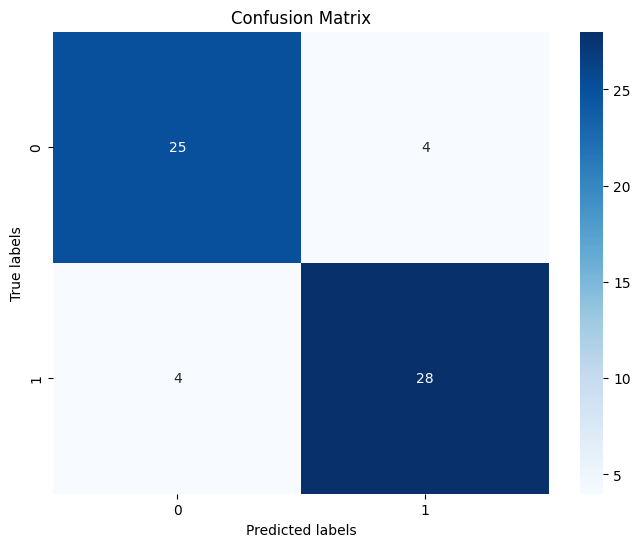

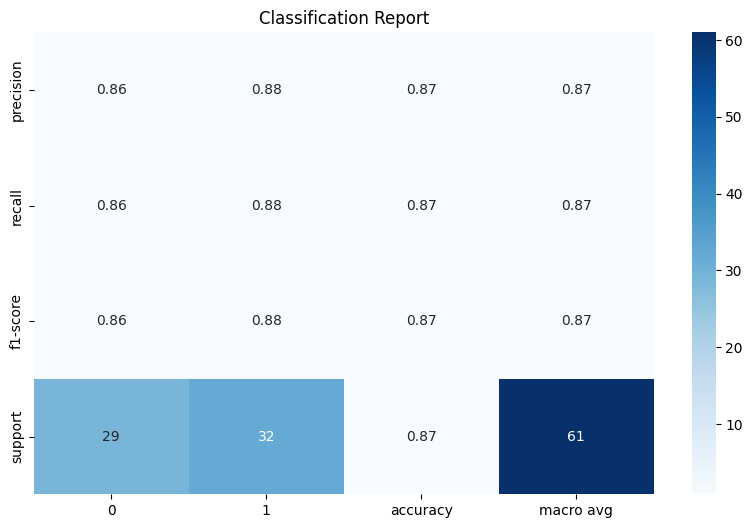

===Comparison Table===
     Actual  Predicted
179       0      False
228       0       True
111       1       True
246       0      False
60        1       True
..      ...        ...
249       0      False
104       1       True
300       0      False
193       0      False
184       0      False

[61 rows x 2 columns]


'\n    The ROC curve is a graphical representation of the true positive rate against the false positive rate.\n    It shows the tradeoff between sensitivity and specificity.\n    The ROC curve is useful because it shows, at a glance, the performance of a classification model.\n'

In [ ]:
'''
    Model evaluation is the process of measuring the performance of a pre-trained model. This is important to understand the extent to which the model can perform classification accurately.
    Meanwhile, the confusion matrix is a table commonly used to describe model performance by comparing model predictions with the actual labels on the test dataset.
'''

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Predict the test set results
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Classification Report
classification_rep = classification_report(y_test, y_pred, output_dict=True)

# Overall model evaluation
accuracy = accuracy_score(y_test, y_pred)

# Evaluation for class 1
class_1_precision = cm[1, 1] / (cm[0, 1] + cm[1, 1])
class_1_recall = cm[1, 1] / (cm[1, 0] + cm[1, 1])

# Evaluation for class 0
class_0_precision = cm[0, 0] / (cm[0, 0] + cm[1, 0])
class_0_recall = cm[0, 0] / (cm[0, 0] + cm[0, 1])

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Visualize the classification report
# classification_df = pd.DataFrame(classification_rep).transpose()
# plt.figure(figsize=(10, 6))
# sns.heatmap(classification_df.iloc[:-1, :].T, annot=True, cmap='Blues')
# plt.title('Classification Report')
# plt.show()

# Create a comparison table
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred.flatten()})
print("===Comparison Table===")
print(comparison_df)

'''
    The ROC curve is a graphical representation of the true positive rate against the false positive rate.
    It shows the tradeoff between sensitivity and specificity.
    The ROC curve is useful because it shows, at a glance, the performance of a classification model.
'''

In [44]:
#coba prediksi kalsifikasi parameter ini menggunakan model yang sudah di buat
input_data = np.array([[60,1,0,130,206,0,0,132,1,2.4,1,2,3]])
input_data = scaler.transform(input_data)
prediksi = model.predict(input_data)
print("===Hasil Prediksi===")
print(prediksi)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
===Hasil Prediksi===
[[0.01112617]]


c:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# 9. Export Model

In [45]:
'''
    Exporting the model to a file is done to save the model that has been created.
'''
#model.save('model_heart_disease_classification.keras')
print("Model has been saved to model.keras")



'''
    The ROC curve is a graphical representation of the true positive rate against the false positive rate.
    It shows the tradeoff between sensitivity and specificity.
    The ROC curve is useful because it shows, at a glance, the performance of a classification model.
'''


Model has been saved to model.keras


'\n    The ROC curve is a graphical representation of the true positive rate against the false positive rate.\n    It shows the tradeoff between sensitivity and specificity.\n    The ROC curve is useful because it shows, at a glance, the performance of a classification model.\n'